<a href="https://colab.research.google.com/github/maheravi/Deep-Learning/blob/main/Recurrent%20Neural%20Network/LSTM_From_Scratch_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

In [8]:
def get_params(input_nodes, hidden_unit, output_nodes):

    def normal(shape):
        return torch.randn(size=shape)*0.01

    def init_mat():
        return (normal((input_nodes, hidden_unit)),
                normal((hidden_unit, hidden_unit)),
                torch.zeros(hidden_unit))

    W_xi, W_hi, b_i = init_mat()  # Enter door parameters
    W_xf, W_hf, b_f = init_mat()  # Forgetting gate parameters
    W_xo, W_ho, b_o = init_mat()  # Output gate parameters
    W_xc, W_hc, b_c = init_mat()  # Candidate memory cell parameters

    # Output layer parameters
    W_hq = normal((hidden_unit, output_nodes))
    b_q = torch.zeros(output_nodes)
    
    # Additional gradient
    params = [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc,
              b_c, W_hq, b_q]

    return params

In [49]:
def lstm(inputs, params):

    [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, W_hq, b_q] = params
     
    H = torch.randn((input_nodes, hidden_unit))*0.01
    C = torch.randn((input_nodes, hidden_unit))*0.01

    outputs = []

    for X in inputs:
      
        I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
        F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
        O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
        C_tilda = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
        C = F * C + I * C_tilda  
        H = O * torch.tanh(C)

        Y = H @ W_hq + b_q
    
    return H

In [50]:
N = 1500
t = np.arange(0,N)

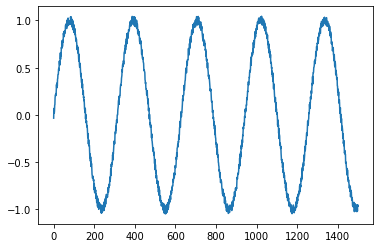

In [51]:
data_sin = np.sin(0.02 * t) + np.random.uniform(-0.05, 0.05, N)
plt.plot(data_sin)

In [52]:
def ConvertSignalToDataset(signal, step):
  X = []
  y = []
  for i in range(len(signal)-step):
    j = i + step
    X.append(signal[i:j])
    y.append(signal[j])

  return np.array(X), np.array(y)

In [53]:
seq_length = 20
X, y = ConvertSignalToDataset(data_sin, seq_length)
X = torch.Tensor(X)

In [54]:
input_nodes = 20
hidden_unit = 64
output_nodes = 1

In [39]:
params = get_params(input_nodes, hidden_unit, output_nodes)

In [44]:
LSTM = lstm(X, params)

In [55]:
output = torch.matmul(LSTM[1], params[12]) + params[13]
output

tensor([-0.0025])